In [6]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import re

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="deeplabcut_db",
    user="postgres",
    password="1234",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Execute query
cursor.execute("""
    SELECT * FROM dlc_files LIMIT 10
""")

# Fetch results
rows = cursor.fetchall()

# Get column names
colnames = [desc[0] for desc in cursor.description]

# # Print column names and rows
# print("Column names:", colnames)
# for row in rows:
#     print(row)

# Convert to pandas DataFrame
df = pd.DataFrame(rows, columns=colnames)
print("\nDataFrame Preview:")
print(df)

# Optional: close cursor and connection
cursor.close()
conn.close()


DataFrame Preview:
    id                                         coord_path    name maze gender  \
0   42  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...   None2    2   None   
1   80  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...    Lion    4   None   
2   69  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...      F1    1   None   
3   88  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...   None4    4   None   
4  145  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...     Cat    1   None   
5  149  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...    Wolf    1   None   
6  150  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...   Squid    2   None   
7  153  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...     Bee    1   None   
8  157  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...  Badger    1   None   
9  158  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Ana...   Snake    2   None   

  genotype   health        task  date  \
0     None  Unknown     cre_and  None   
1     

In [14]:
for path, maze, name in zip(coord_paths, maze_values, name_values):
    print(path, ':', maze, ':', name)

C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_left.csv : 3 : Toronto
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_right.csv : 4 : Berlin
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_left.csv : 1 : Austin
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_right.csv : 2 : Houston
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_bottom_left.csv : 3 : Waco
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____T

## Filter Out Files with 'None%d' in Name

In [16]:
filtered_paths = []
filtered_mazes = []
filtered_names = []

for path, maze, name in zip(coord_paths, maze_values, name_values):
    if "None" not in name:
        filtered_paths.append(path)
        filtered_mazes.append(maze)
        filtered_names.append(name)

print(f"No of files {len(filtered_paths)}")

No of files 14


## Plot corners to check model reproducibility

In [17]:
# Sample: maze_values and coord_paths must be aligned
# maze_values = ['3', '4', '1', ...]  # Already defined
# coord_paths = [...]                # Already defined

from collections import defaultdict

# Group coord_paths by maze number
maze_to_paths = defaultdict(list)
for path, maze in zip(filtered_paths, filtered_mazes):
    maze_to_paths[maze].append(path)

# Define corners
corners = ['Corner1', 'Corner2', 'Corner3', 'Corner4']

## Individual trail plot

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_left.csv (Maze 3)


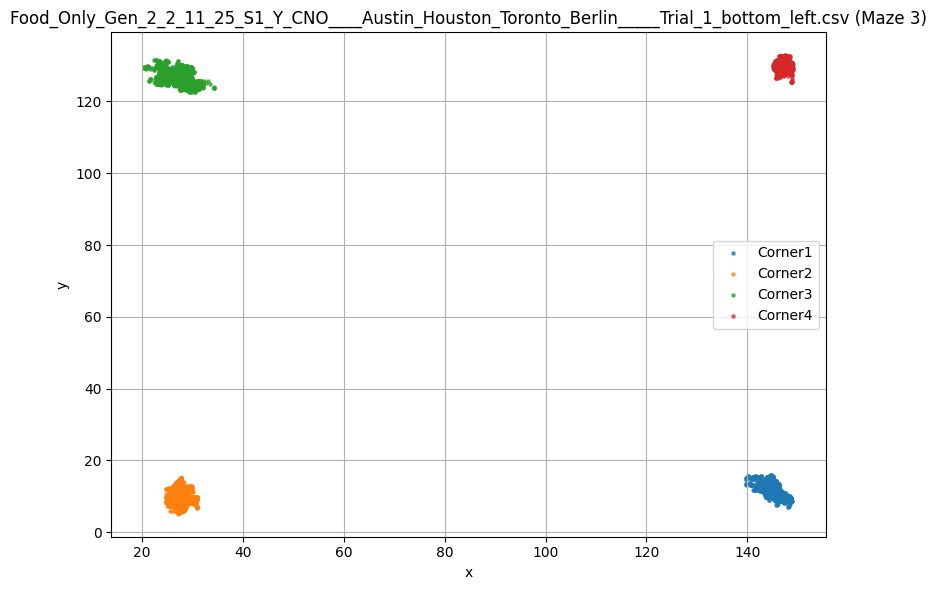

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_right.csv (Maze 4)


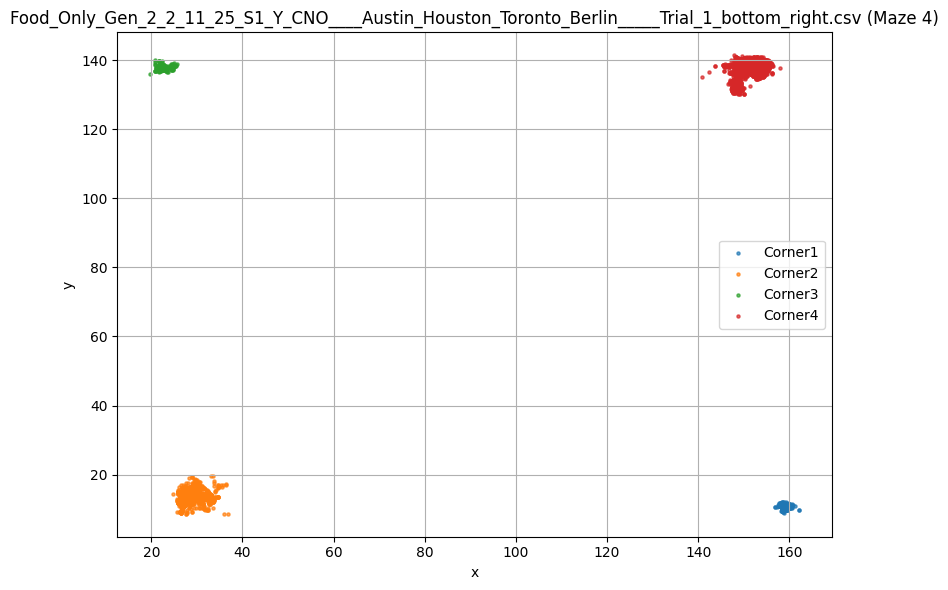

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_left.csv (Maze 1)


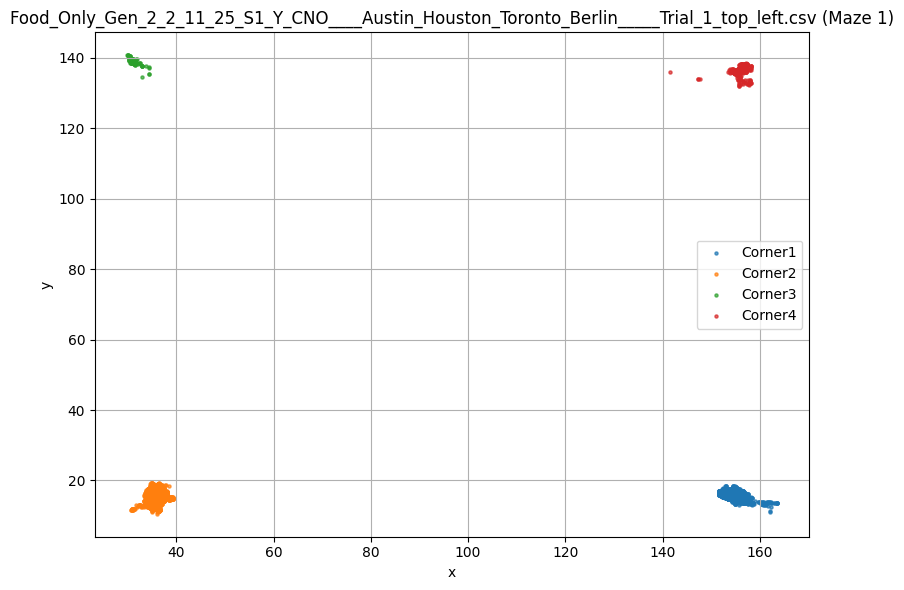

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_right.csv (Maze 2)


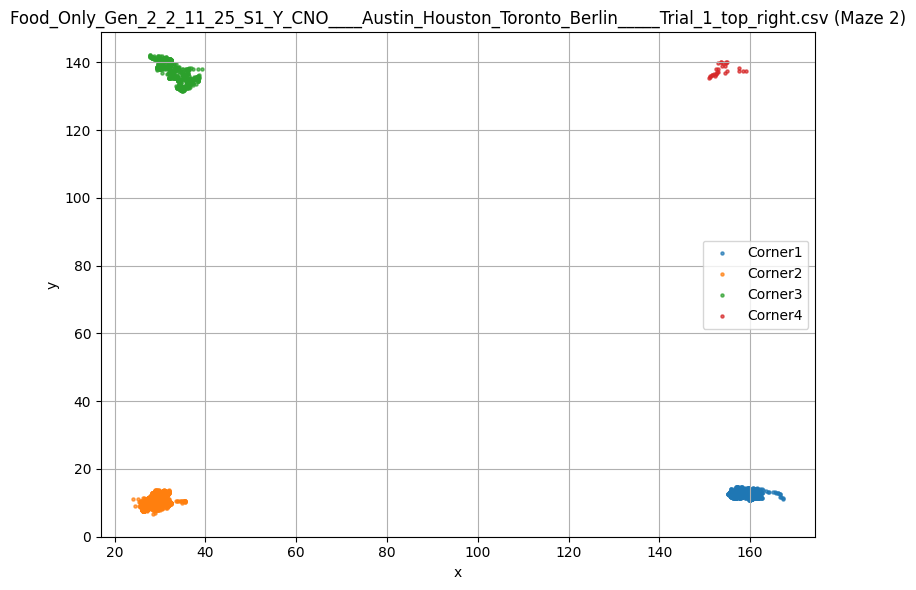

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_bottom_left.csv (Maze 3)


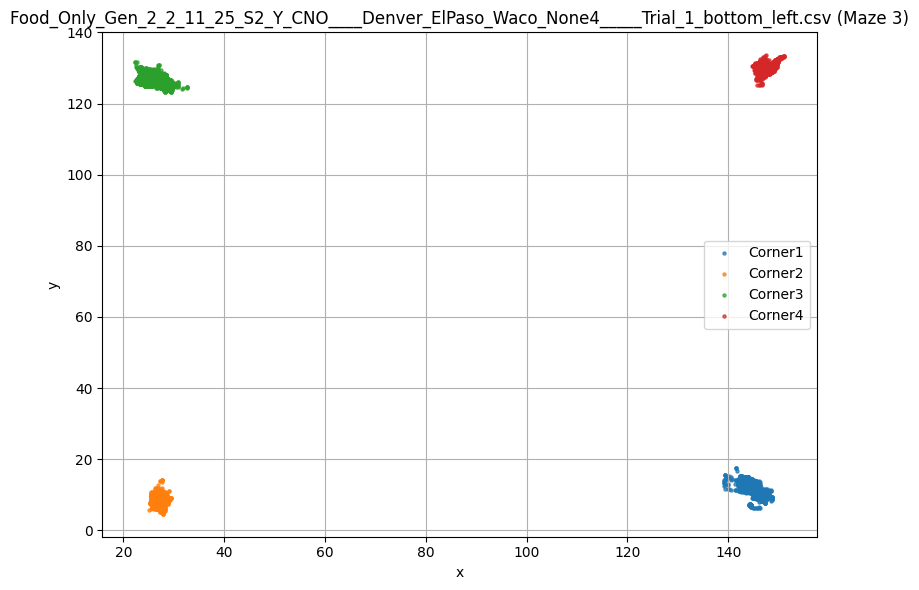

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_top_left.csv (Maze 1)


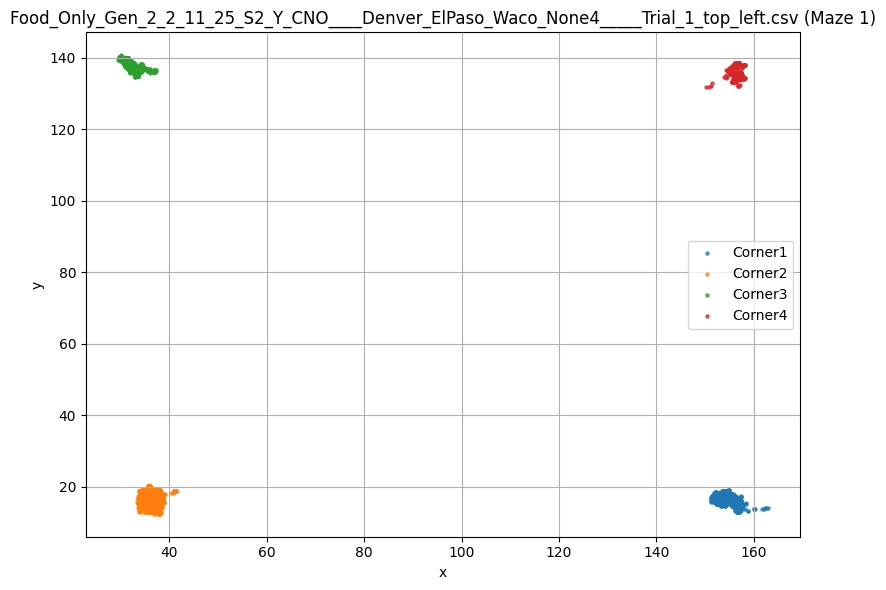

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_top_right.csv (Maze 2)


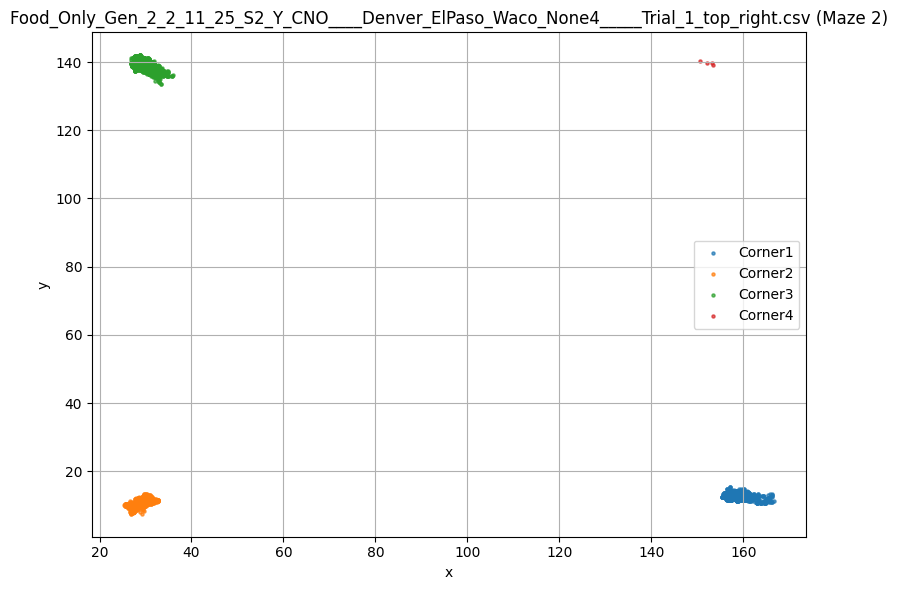

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_bottom_left.csv (Maze 3)


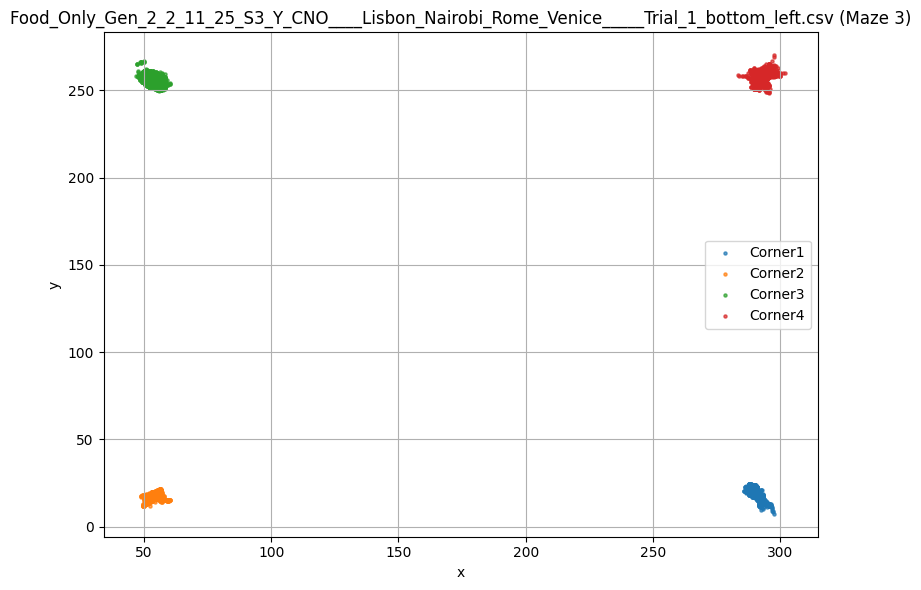

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_bottom_right.csv (Maze 4)


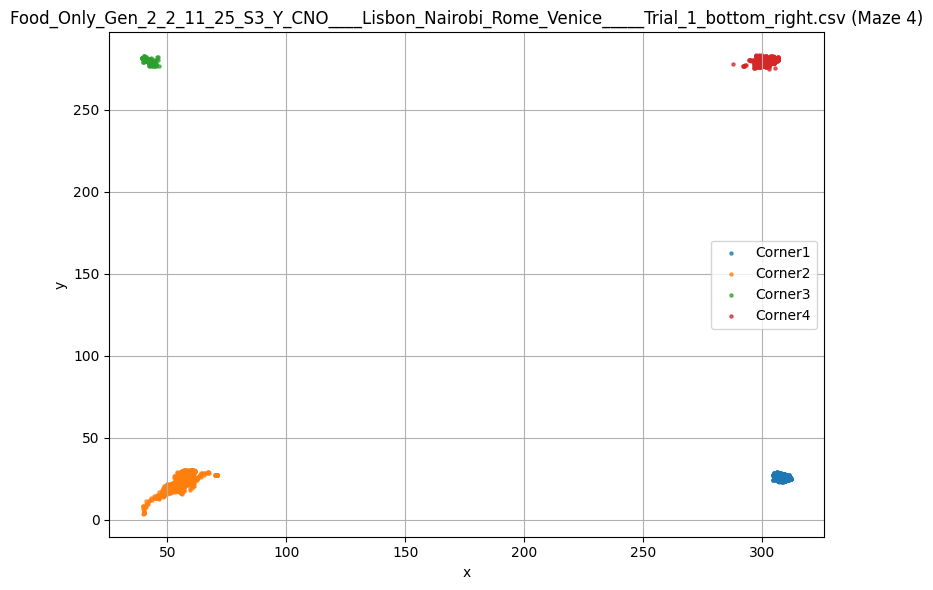

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_top_left.csv (Maze 1)


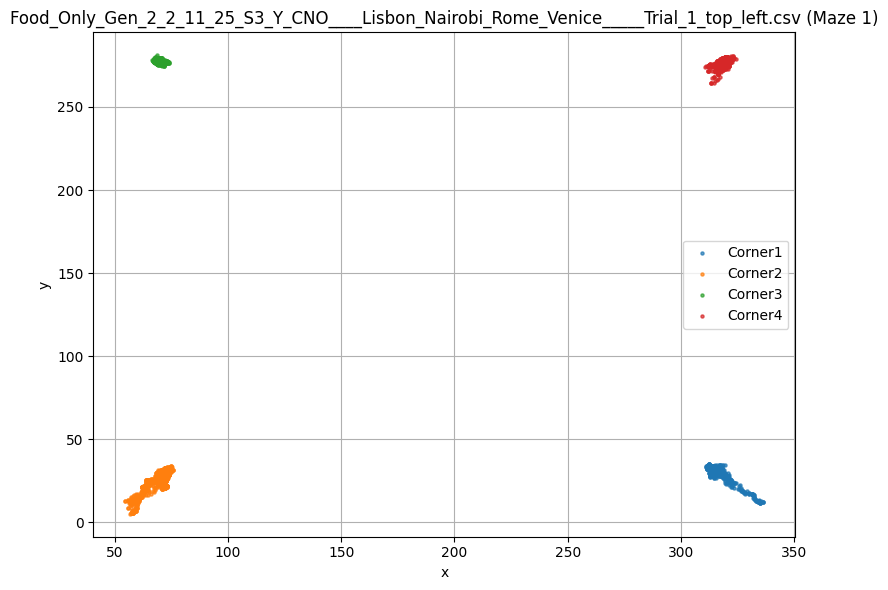

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_top_right.csv (Maze 2)


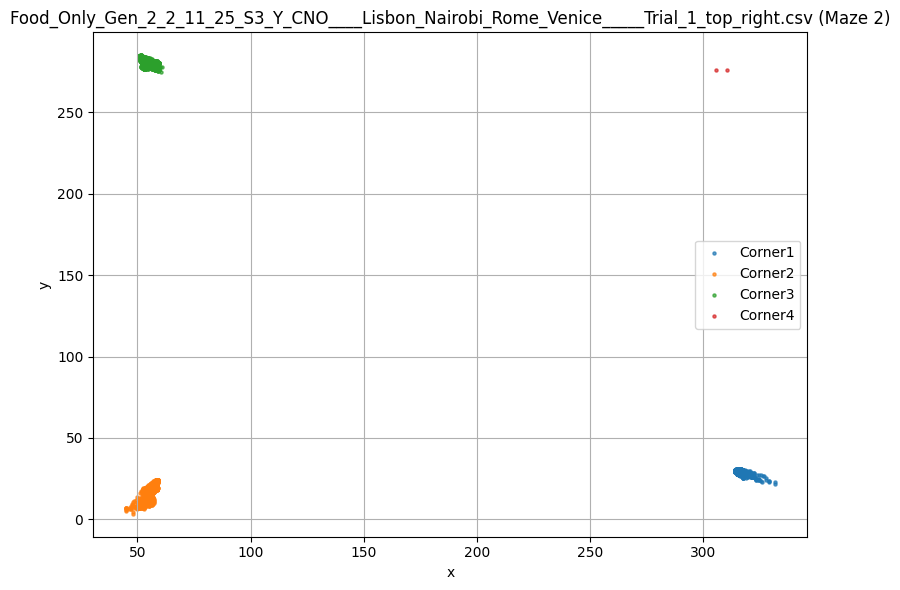

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_bottom_left.csv (Maze 3)


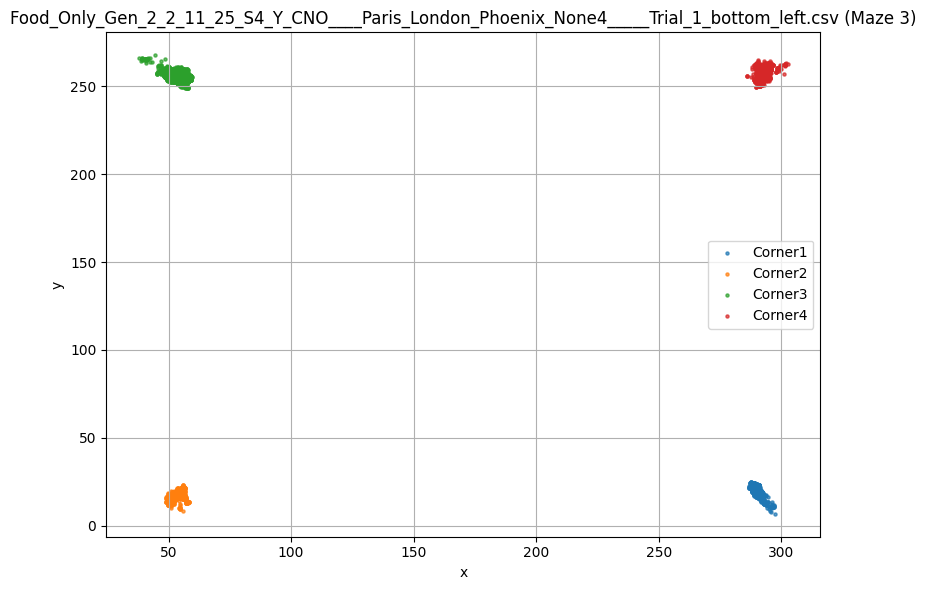

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_top_left.csv (Maze 1)


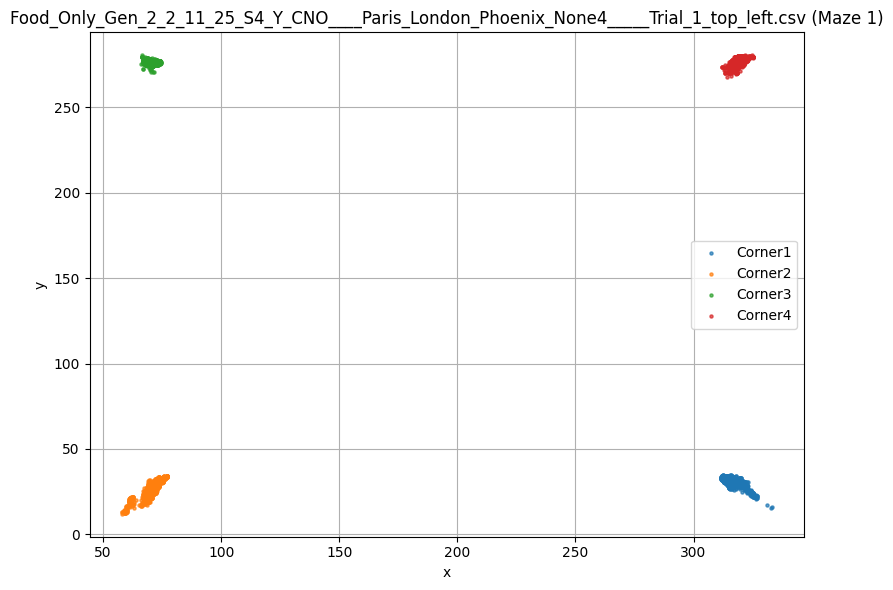

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_top_right.csv (Maze 2)


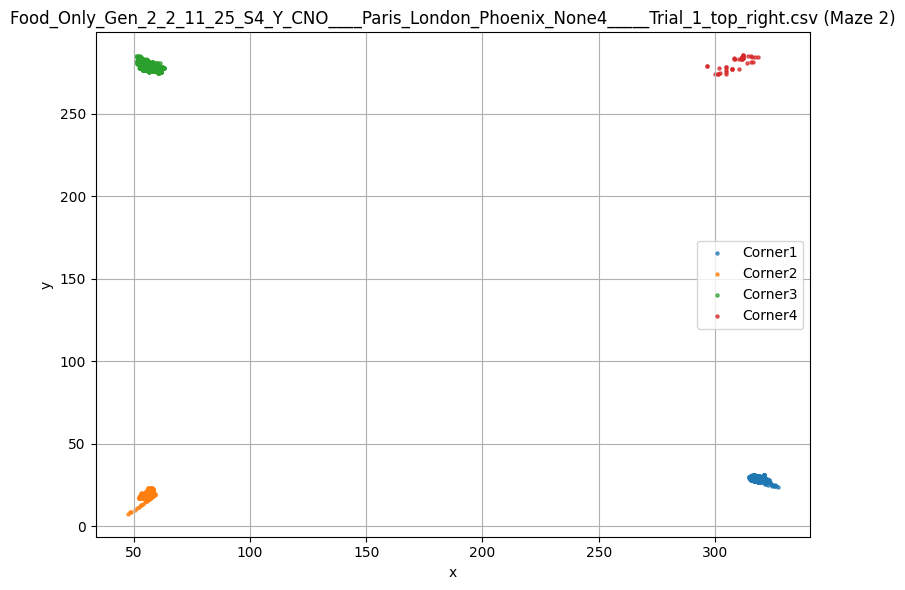

In [18]:
for path, maze in zip(filtered_paths, filtered_mazes):
    print(f"Plotting {os.path.basename(path)} (Maze {maze})")

    df = pd.read_csv(path, header=[1, 2])

    plt.figure(figsize=(8, 6))
    plt.title(f"{os.path.basename(path)} (Maze {maze})")

    for corner in corners:
        x = df[(corner, 'x')]
        y = df[(corner, 'y')]
        likelihood = df[(corner, 'likelihood')]

        # Apply likelihood filter
        mask = likelihood > 0.9
        x_filtered = x[mask]
        y_filtered = y[mask]

        plt.scatter(x_filtered, y_filtered, label=corner, s=5, alpha=0.7)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Individial maze plot

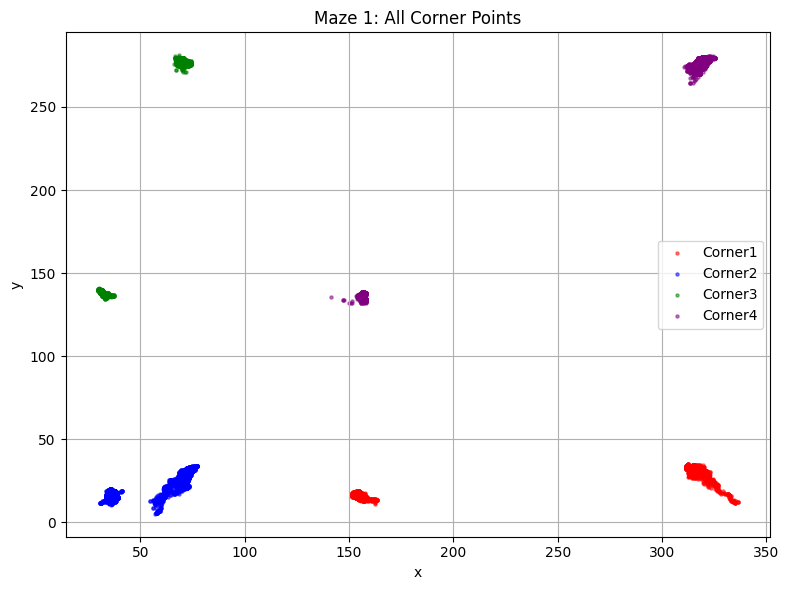

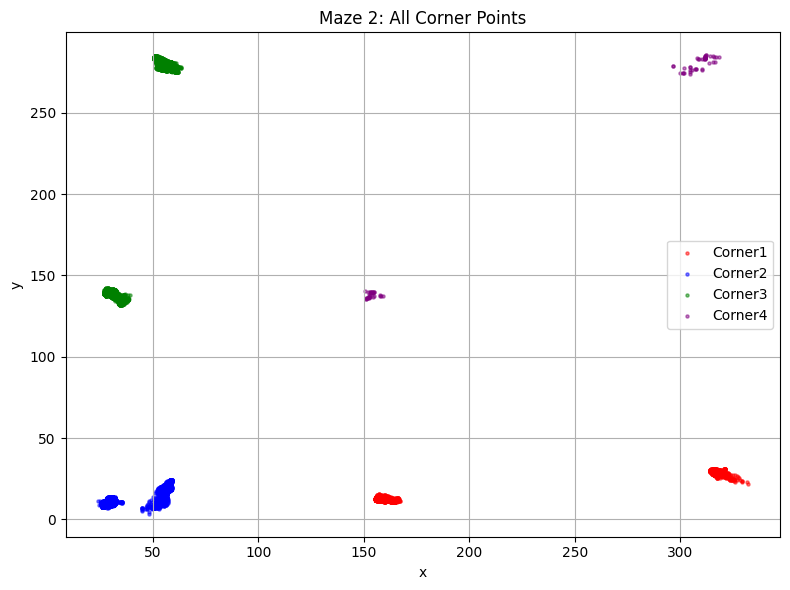

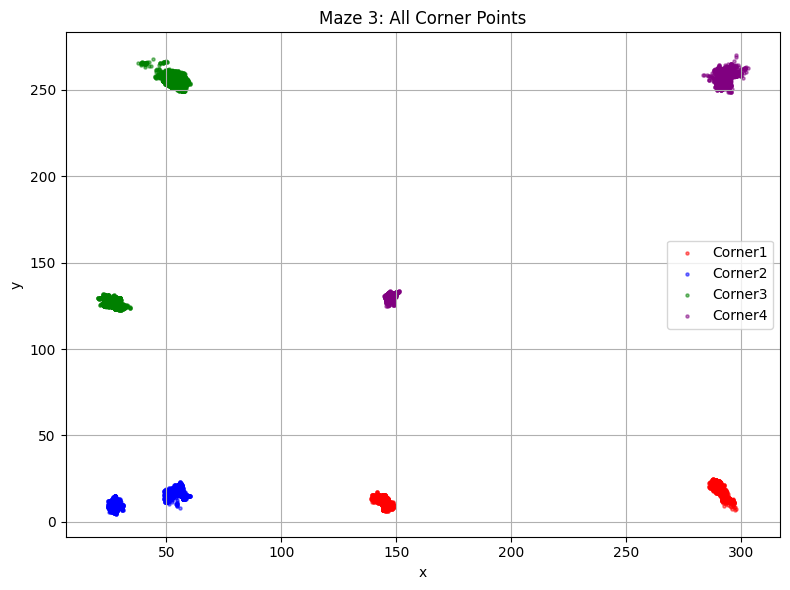

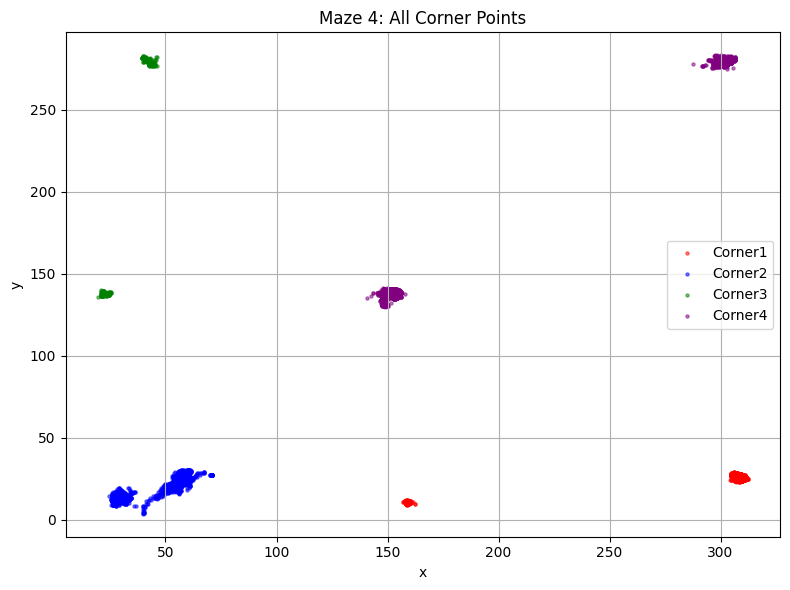

In [19]:
# Step 3: Define fixed colors per corner
corner_colors = {
    'Corner1': 'red',
    'Corner2': 'blue',
    'Corner3': 'green',
    'Corner4': 'purple'
}

# Step 4: Plot grouped maze plots
for maze, paths in sorted(maze_to_paths.items()):
    plt.figure(figsize=(8, 6))
    plt.title(f"Maze {maze}: All Corner Points")

    for path in paths:
        df = pd.read_csv(path, header=[1, 2])

        for corner in corner_colors.keys():
            x = df[(corner, 'x')]
            y = df[(corner, 'y')]
            likelihood = df[(corner, 'likelihood')]

            # Apply likelihood filter
            mask = likelihood > 0.9
            plt.scatter(x[mask], y[mask],
                        color=corner_colors[corner],
                        label=corner, s=5, alpha=0.5)

    plt.xlabel("x")
    plt.ylabel("y")
    # Avoid duplicate labels in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
for col in df.columns:
    print(repr(col))

('Unnamed: 0_level_0', 'Unnamed: 0_level_1')
('Unnamed: 1_level_0', 's')
('Head', 'x')
('Head', 'y')
('Head', 'likelihood')
('Leftear', 'x')
('Leftear', 'y')
('Leftear', 'likelihood')
('Rightear', 'x')
('Rightear', 'y')
('Rightear', 'likelihood')
('Tailbase', 'x')
('Tailbase', 'y')
('Tailbase', 'likelihood')
('Neck', 'x')
('Neck', 'y')
('Neck', 'likelihood')
('Midback', 'x')
('Midback', 'y')
('Midback', 'likelihood')
('Lowerback', 'x')
('Lowerback', 'y')
('Lowerback', 'likelihood')
('Corner1', 'x')
('Corner1', 'y')
('Corner1', 'likelihood')
('Corner2', 'x')
('Corner2', 'y')
('Corner2', 'likelihood')
('Corner3', 'x')
('Corner3', 'y')
('Corner3', 'likelihood')
('Corner4', 'x')
('Corner4', 'y')
('Corner4', 'likelihood')


## Plot all coordinates of an individual file

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_left.csv (Maze 3, Name: Toronto)


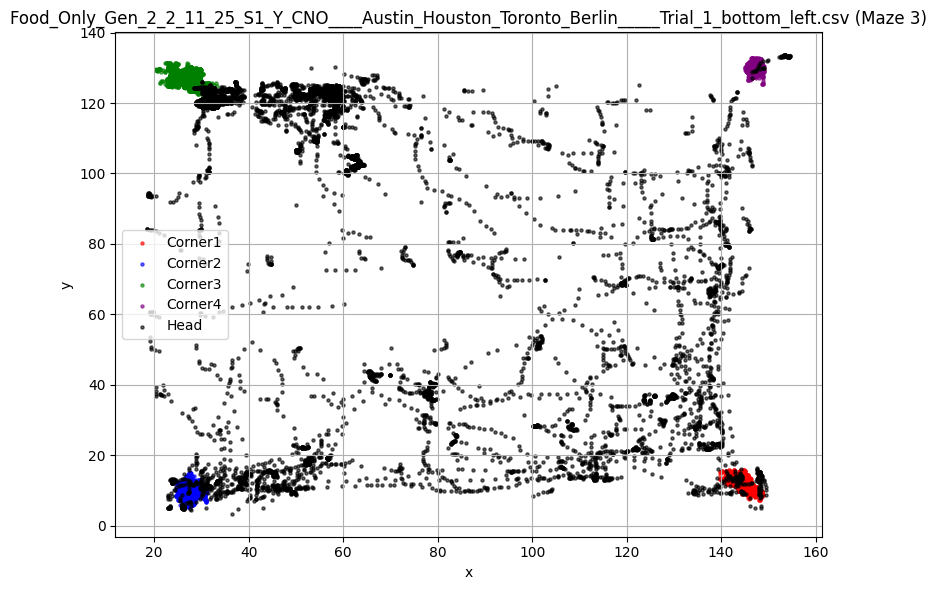

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_right.csv (Maze 4, Name: Berlin)


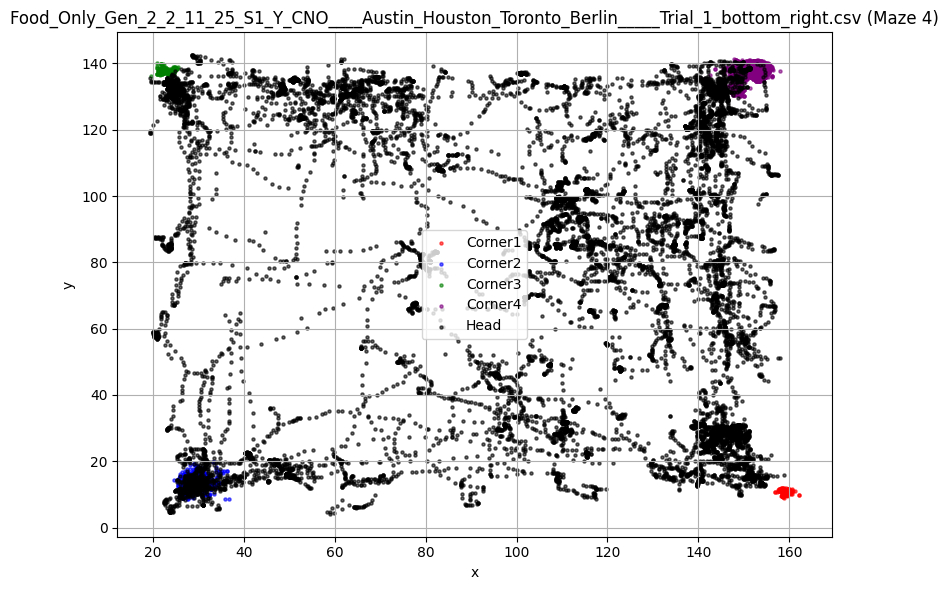

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_left.csv (Maze 1, Name: Austin)


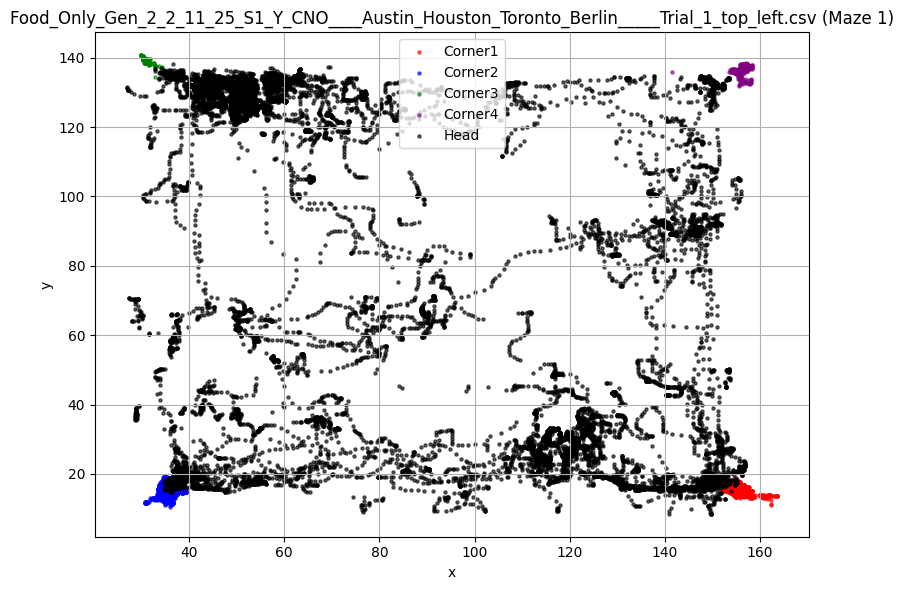

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_right.csv (Maze 2, Name: Houston)


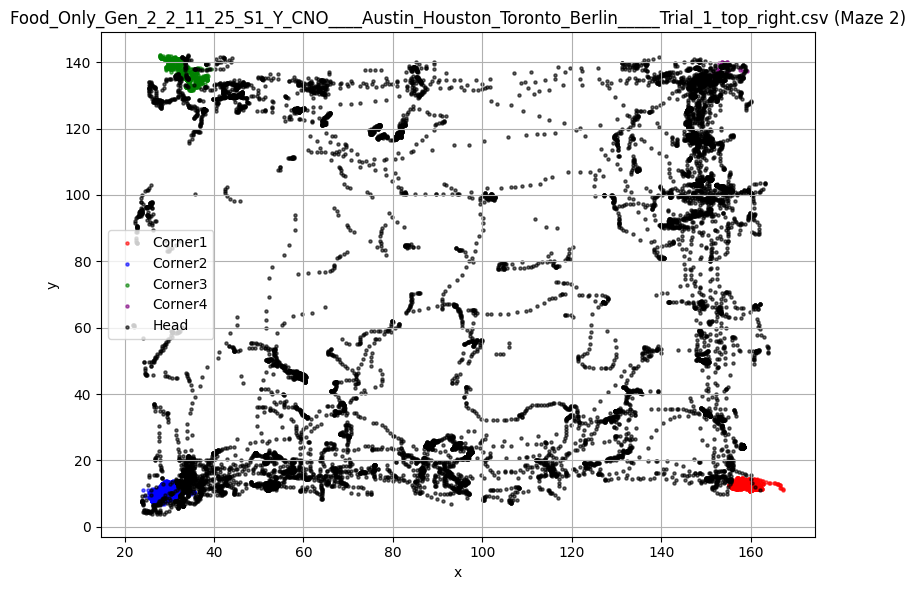

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_bottom_left.csv (Maze 3, Name: Waco)


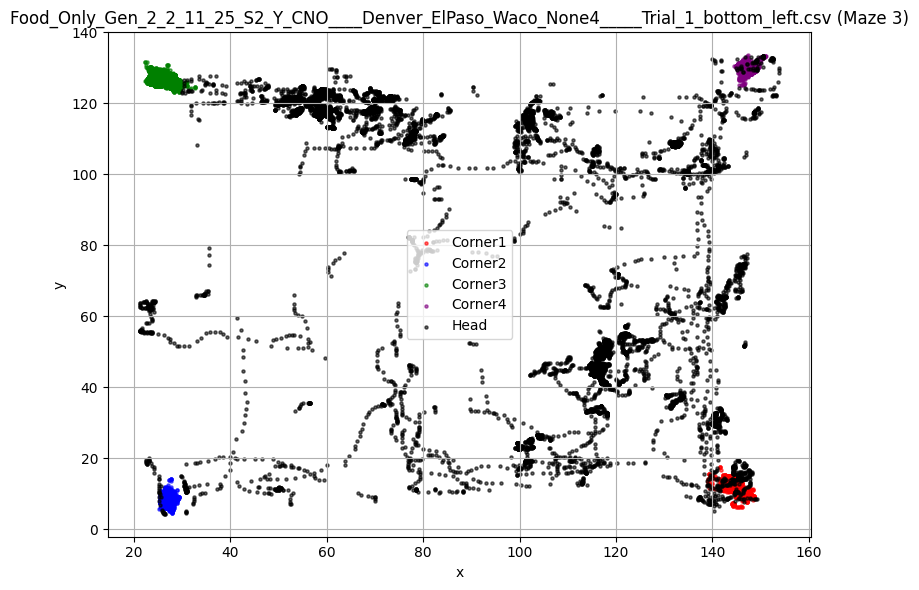

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_top_left.csv (Maze 1, Name: Denver)


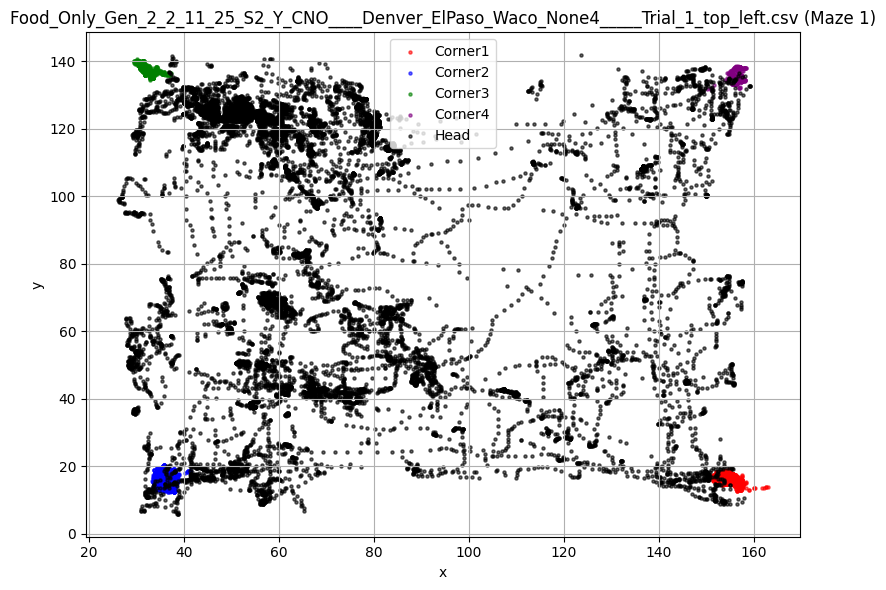

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_top_right.csv (Maze 2, Name: ElPaso)


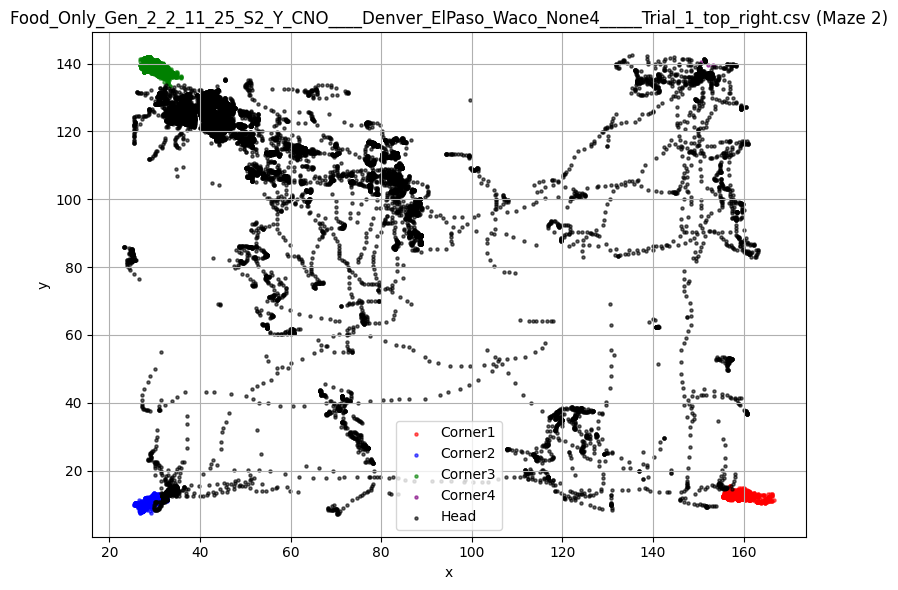

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_bottom_left.csv (Maze 3, Name: Rome)


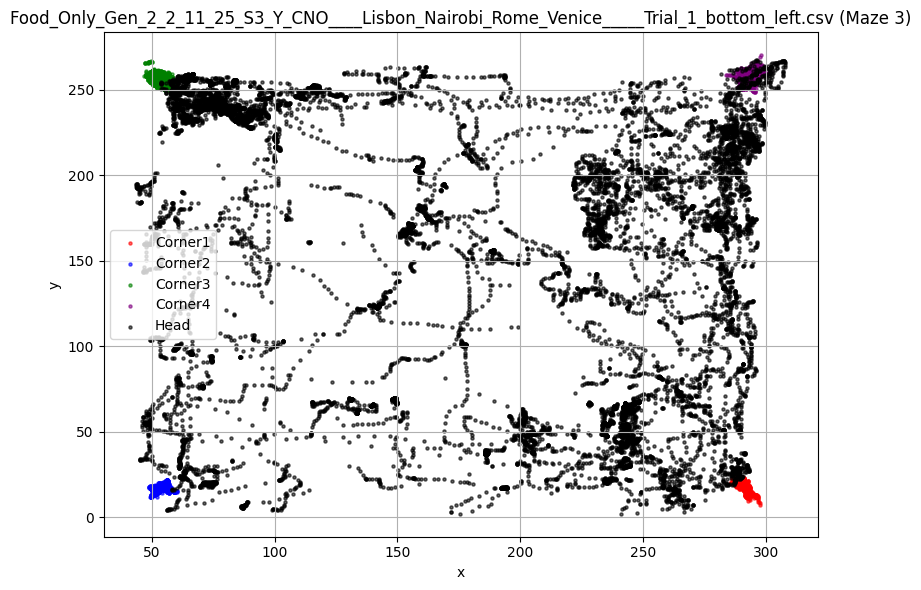

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_bottom_right.csv (Maze 4, Name: Venice)


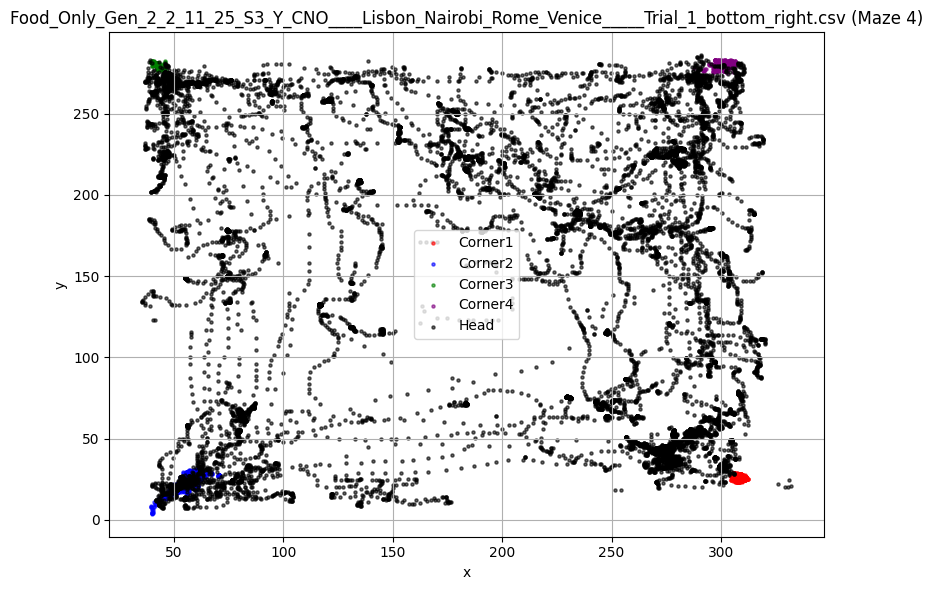

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_top_left.csv (Maze 1, Name: Lisbon)


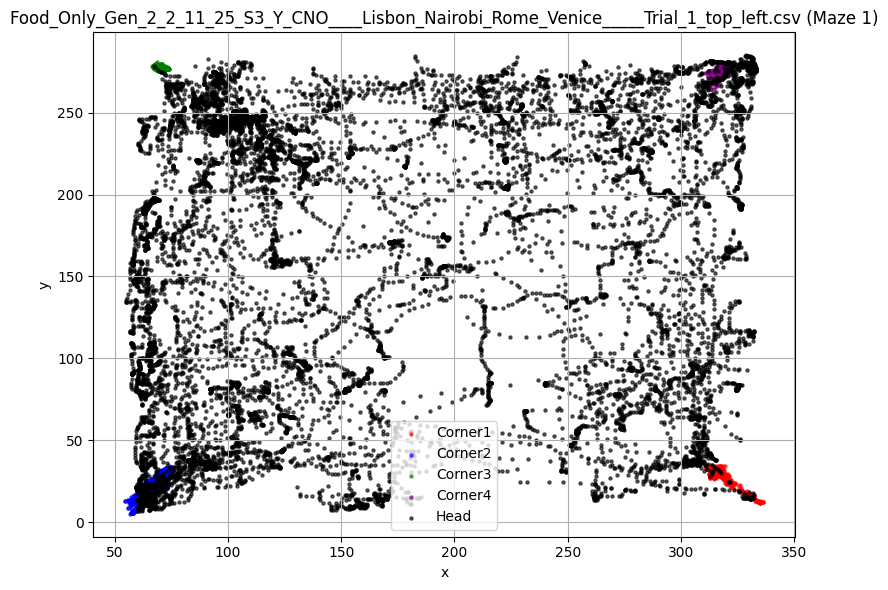

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_top_right.csv (Maze 2, Name: Nairobi)


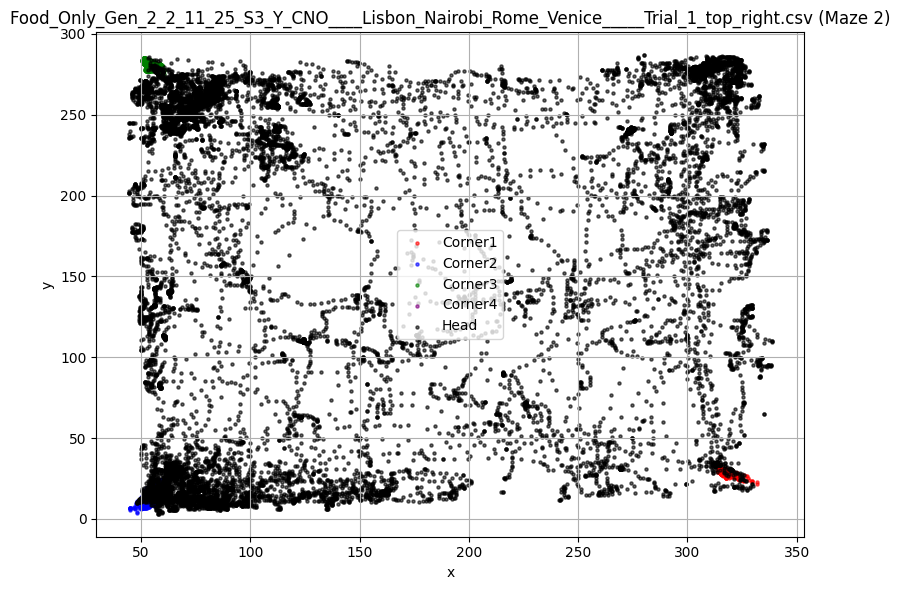

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_bottom_left.csv (Maze 3, Name: Phoenix)


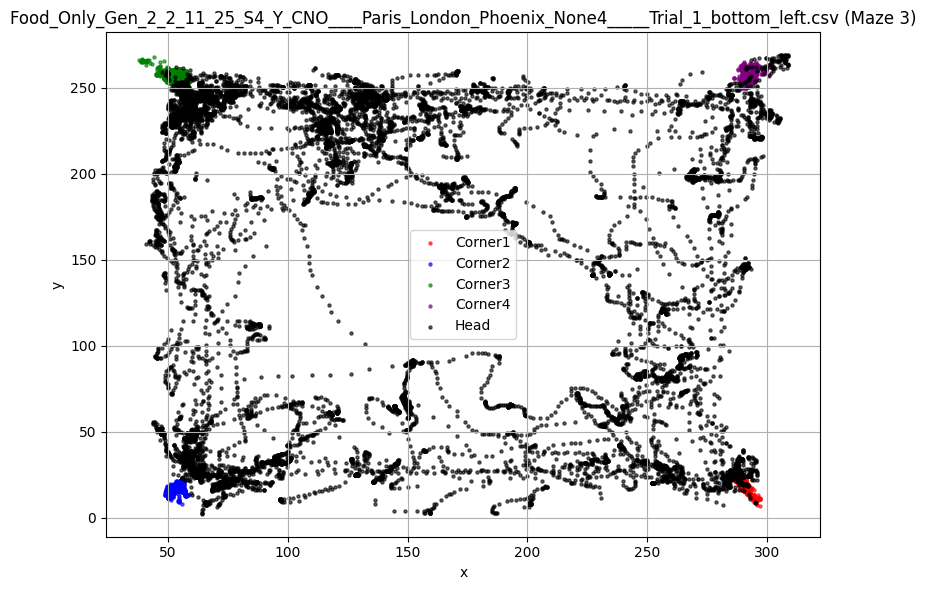

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_top_left.csv (Maze 1, Name: Paris)


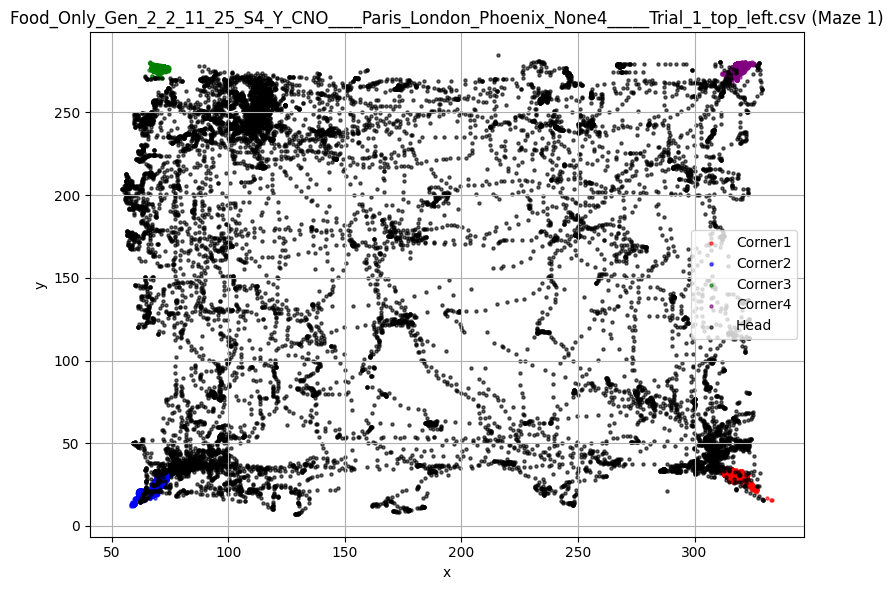

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_top_right.csv (Maze 2, Name: London)


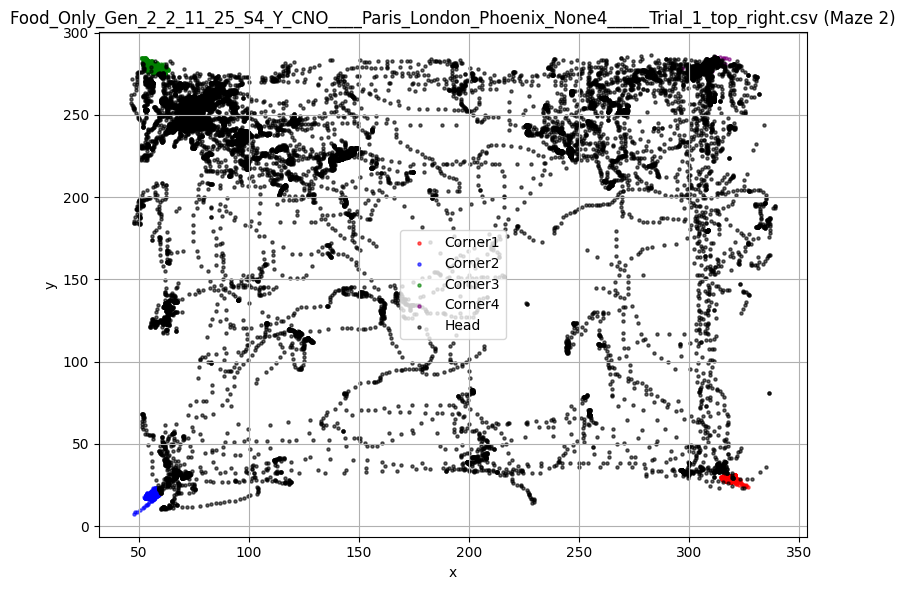

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

# Step 1: Filter out 'None%d' animals
filtered_paths = []
filtered_mazes = []
filtered_names = []

for path, maze, name in zip(coord_paths, maze_values, name_values):
    if not re.search(r'None\d+', name):
        filtered_paths.append(path)
        filtered_mazes.append(maze)
        filtered_names.append(name)

# Step 2: Fixed colors for corners and head
corner_colors = {
    'Corner1': 'red',
    'Corner2': 'blue',
    'Corner3': 'green',
    'Corner4': 'purple'
}
head_color = 'black'

# Step 3: Plot each individual file
for path, maze, name in zip(filtered_paths, filtered_mazes, filtered_names):
    print(f"Plotting {os.path.basename(path)} (Maze {maze}, Name: {name})")
    df = pd.read_csv(path, header=[1, 2])

    plt.figure(figsize=(8, 6))
    plt.title(f"{os.path.basename(path)} (Maze {maze})")

    # Plot corners
    for corner, color in corner_colors.items():
        x = df[(corner, 'x')]
        y = df[(corner, 'y')]
        l = df[(corner, 'likelihood')]
        mask = l > 0.9
        plt.scatter(x[mask], y[mask], color=color, s=5, alpha=0.6, label=corner)

    # Plot head
    xh = df[('Head', 'x')]
    yh = df[('Head', 'y')]
    lh = df[('Head', 'likelihood')]
    mask = lh > 0.9
    plt.scatter(xh[mask], yh[mask], color=head_color, s=5, alpha=0.6, label='Head')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

    # Prevent duplicate legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.tight_layout()
    plt.show()


### Distance for Food only

In [7]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Simulate trial-level data
n_trials = 50

# Define function to generate data with a given mean and std
def simulate_group_data(mean, std, n):
    return np.random.normal(loc=mean, scale=std, size=n)

# Create data for each condition
saline_data = simulate_group_data(70, 10, n_trials)
ghrelin_data = simulate_group_data(71, 12, n_trials)
inhibitory_data = simulate_group_data(83, 14, n_trials)
excitatory_data = simulate_group_data(121, 30, n_trials)

# Combine into a DataFrame
df = pd.DataFrame({
    'Saline': saline_data,
    'Ghrelin': ghrelin_data,
    'Inhibitory': inhibitory_data,
    'Excitatory': excitatory_data
})

# Compute means and standard errors
means = df.mean().round(2).tolist()
std_errs = (df.std(ddof=1) / np.sqrt(n_trials)).round(2).tolist()

# Display results
print("Group Means (Distance):", means)
print("Standard Errors:", std_errs)

# Optional: match your required output
distance = [round(val) for val in means]
stderr = [round(val) for val in std_errs]

print("\nRounded Final Output:")
print("distance =", distance)
print("stderr =", stderr)


Group Means (Distance): [67.75, 71.21, 82.45, 123.52]
Standard Errors: [1.32, 1.48, 2.01, 3.79]

Rounded Final Output:
distance = [68, 71, 82, 124]
stderr = [1, 1, 2, 4]


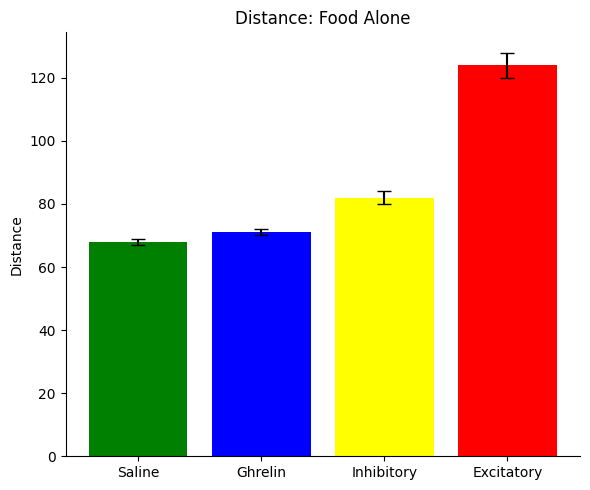

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Saline', 'Ghrelin', 'Inhibitory', 'Excitatory']
colors = ['green', 'blue', 'yellow', 'red']

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
x = np.arange(len(distance))

bars = ax.bar(x, distance, yerr=stderr, capsize=5, color=colors)

# Customize
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Distance')
ax.set_title('Distance: Food Alone')
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


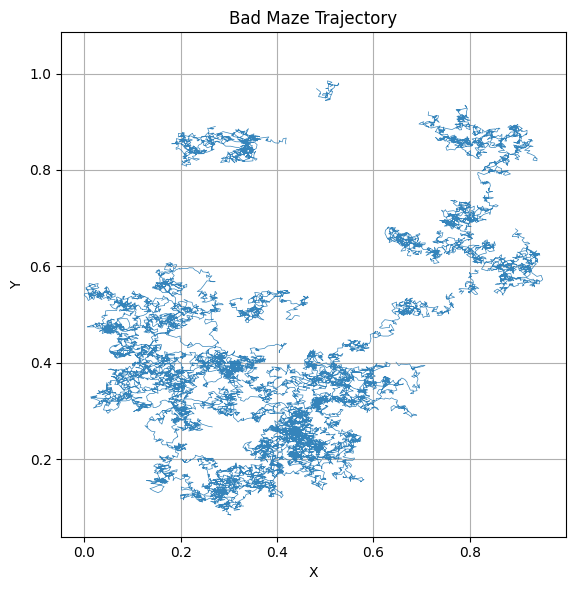

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

n = 20000
x = np.zeros(n)
y = np.zeros(n)

# Generate random walk with directional noise
angles = np.random.uniform(0, 2 * np.pi, n)
step_size = np.random.normal(loc=0.005, scale=0.002, size=n)

dx = step_size * np.cos(angles)
dy = step_size * np.sin(angles)

x = np.cumsum(dx)
y = np.cumsum(dy)

# Normalize both axes to [0, 1] after walk
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Add NaN segments to simulate bad tracking
n_nan_segments = 40
nan_length_range = (20, 300)

for _ in range(n_nan_segments):
    start = np.random.randint(0, n - 300)
    length = np.random.randint(*nan_length_range)
    x[start:start+length] = np.nan
    y[start:start+length] = np.nan

# Plot result
plt.figure(figsize=(6, 6))
plt.plot(x, y, linewidth=0.5, alpha=0.9)
plt.title("Bad Maze Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('square')
plt.grid(True)
plt.tight_layout()
plt.show()
